<a href="https://colab.research.google.com/github/Ja-Osuna/Docs/blob/main/ML_FinalExam10_JuanOsuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Final Exam - Juan Antonio Osuna**

**PREPARATION**

*Install packages needed*

In [458]:
!pip install chainconsumer

*Importing Libraries*

In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn import preprocessing

**DATA MANIPULATION**

*Load the data to the program*

In [460]:
# NOTE: I had to download and upload the file to Github in order to use it in Google Colab
diabetes = pd.read_csv('https://raw.githubusercontent.com/Ja-Osuna/Docs/main/diabetes.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.7 KB


*Example of our data* 

In [461]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


*Description of our data*

In [462]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**CORRELATION & FINDING THE BEST PARAMETERS**

*Plot the correlation between our characteristics*

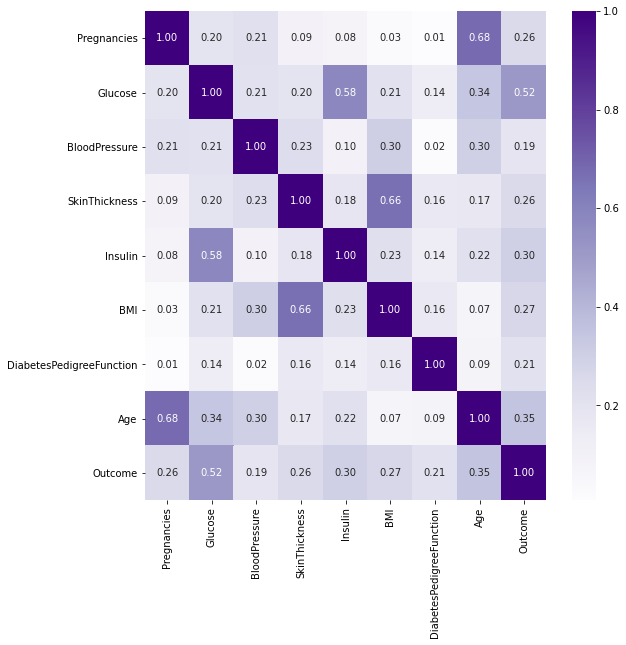

In [463]:
# We obtain an array with the absolute value of each correlation value and
# we represent them in a colorbar, we put annot =   True to write the data value in each cell.
plt.figure(figsize=(9, 9))
sns.heatmap(np.abs(diabetes.corr()), annot=True, cmap='Purples', fmt='0.2f')

*Separate our Outcome from our data*

In [464]:
x = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
y = y.values

*Now we find the best parameters for the analysis*

Optimal number of features : 4
Best features for the analysis: ['Glucose', 'Insulin', 'BMI', 'Age']


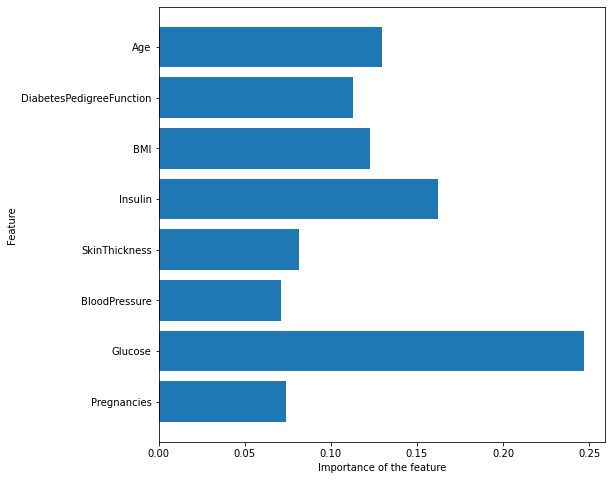

In [465]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

cv_estimator = RandomForestClassifier(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=42)
cv_estimator.fit(X_train, Y_train)
cv_selector = RFECV(cv_estimator, cv=5, step=1, scoring='accuracy')
cv_selector = cv_selector.fit(X_train, Y_train)
rfecv_mask = cv_selector.get_support()  # list of booleans
rfecv_features = []
for bool, feature in zip(rfecv_mask, X_train.columns):
    if bool:
        rfecv_features.append(feature)
print('Optimal number of features :', cv_selector.n_features_)
print('Best features for the analysis:', rfecv_features)
n_features = X_train.shape[1]
plt.figure(figsize=(8, 8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns.values)
plt.xlabel('Importance of the feature')
plt.ylabel('Feature')
plt.show()


*Now that we know the best features, we only use those in our data frame*

In [466]:
# We indicate the features that we want to use, and we 'update' our data to only use those
diabetes = diabetes[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']]
print('Example of the New table:')
diabetes.head()

Example of the New table:


,Glucose,BMI,Age,Insulin,Outcome
0,89,28.1,21,94,0
1,137,43.1,33,168,1
2,78,31.0,26,88,1
3,197,30.5,53,543,1
4,189,30.1,59,846,1


*We plot the correlation with the new data frame (contains the outcome)*

Correlation of the best parameters:


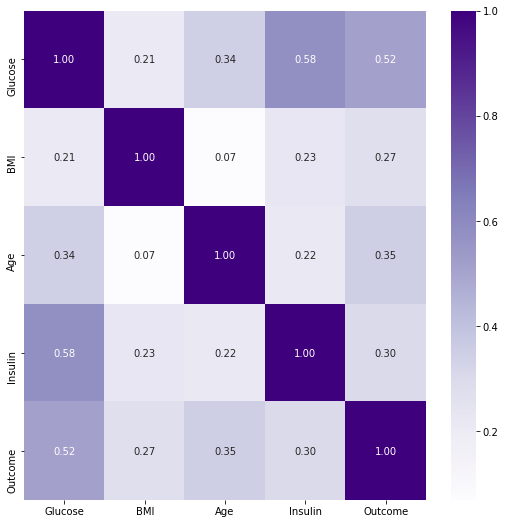

In [467]:
# Once again, we represent our correlation values with a heatmap.
print('Correlation of the best parameters:')
plt.figure(figsize=(9, 9))
sns.heatmap(np.abs(diabetes.corr()), annot=True, cmap='Purples', fmt='0.2f')

*We separate our Outcome from our data once again*

In [468]:
# We needed the Outcome to see the correlation that it has with each feature.
# Now we dont need it, so we separate it.
x = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
y = y.values

*We display the information in a new table*

In [469]:
print('Table of our characteristics for each example')
x

Table of our characteristics for each example


,Glucose,BMI,Age,Insulin
0,89,28.1,21,94
1,137,43.1,33,168
2,78,31.0,26,88
3,197,30.5,53,543
4,189,30.1,59,846
...,...,...,...,...
387,181,43.3,26,510
388,128,36.5,37,110
389,88,28.4,22,16
390,101,32.9,63,180


**K FOLD**

*Application with Logistic Regression*

In [470]:
# We use this function where we specify that we want to apply kfold
# We indicate the number os splits and if we want to shuffle our data
kfold = model_selection.KFold(n_splits=10, shuffle=True)
# We indicate that we want our model to work with Logistic Regression instead of RandomForests
kfold_model = LogisticRegression()
kfold_results = model_selection.cross_val_score(kfold_model, x, y, cv=kfold)

**NUMBER OF FAILURES AND SUCCESSES**

*As Confusion Matrix*

In [471]:
from sklearn import metrics
# We fit our training examples to our Logistic Regression, which is our k fold model
kfold_model.fit(X_train, Y_train)
prediction = kfold_model.predict(X_test)
confusion_mtx = metrics.confusion_matrix(Y_test, prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(0, 0.5, 'Expected Result')

<Figure size 432x288 with 0 Axes>

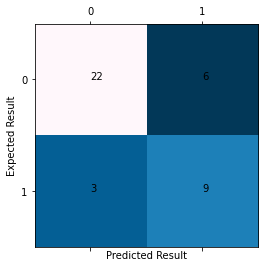

In [472]:
plt.figure()
plt.matshow(confusion_mtx, cmap='PuBu_r')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_mtx[x, y])

plt.xlabel('Predicted Result')
plt.ylabel('Expected Result')


*More Explicitly*

In [473]:
# [row, column]
TrueP = confusion_mtx[1, 1]
FalseP = confusion_mtx[1, 0]
TrueN = confusion_mtx[0, 0]
FalseN = confusion_mtx[0, 1]

print('True positive =', TrueP)
print('False positive =', FalseP)
print('True negative =', TrueN)
print('False negative =', FalseN, '\n')
# print(confusion_mtx)

True positive = 9
False positive = 6
True negative = 22
False negative = 3 



**RESULTS**

*Accuracy*

In [474]:
# Degree to which the result of a measurement, calculation, or specification conforms to the correct value.
# This tells us how correct or precise is ocur program.
print('Accuracy: %.02f%%' % (kfold_results.mean() * 100))

Accuracy: 79.85%


*Sensitivity*

In [475]:
# Sensitivity is a measure of how well a test can identify true positives.
# It is the percentage, or proportion, of true positives out of all the samples that have the condition (true positives and false negatives).
# For example, the proportion of those who truly have a disease (affected) who are correctly identified as having it.
print("Sensitivity: %d%%" % (TrueP * 100 / float(TrueP + FalseN)))

Sensitivity: 75%


*Specificity*

In [476]:
# Specificity is a measure of how well a test can identify true negatives.
# It is the percentage, or proportion, of the true negatives out of all the samples that do not have the condition (true negatives and false positives). 
# For example, the proportion of those who truly do not have the condition (unaffected) who are correctly identified as not having it.
print("Specificity  : %d%%" % (TrueN * 100 / float(TrueN + FalseP)))

Specificity  : 78%
